In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.cm import inferno


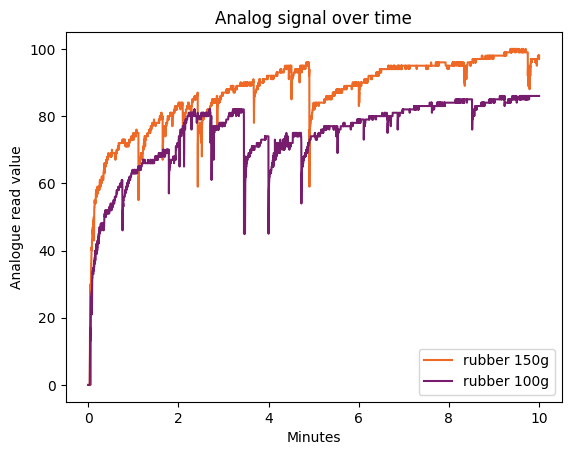

In [46]:
import os
directory = "/its/home/drs25/Documents/GitHub/tactile_hands/Experimental/data/cap0.1uf/"
all_items = os.listdir(directory)
files = [f for f in all_items if os.path.isfile(os.path.join(directory, f))]

pattern={"velostat":"-.","rubber":"-"}
categories = ["50g", "100g", "150g", "200g"]
n = len(categories)
colours = {cat: inferno(i/(n-1)) for i, cat in enumerate(categories)}
data=[]
labels=[]
for i in range(len(files)):
    if ".csv" in files[i]:
        name=files[i].split("_")
        size=name[2].split(".")[0]
        material=name[1]
        d=pd.read_csv(directory+files[i])
        d['timestamp'] = pd.to_datetime(d['timestamp'])
        data.append(d['value'])
        labels.append(name)
        seconds = d['timestamp'].dt.second.tolist()
        d['elapsed'] = (d['timestamp'] - d['timestamp'].iloc[0]).dt.total_seconds()/60
        plt.plot(d['elapsed'],d['value'],label=material+" "+size,c=colours[size],linestyle=pattern[material])
        #plt.xlabel([i for i in range(0,len(d['timestamp']))],d['timestamp'])

plt.xlabel("Minutes")
plt.ylabel("Analogue read value")
plt.legend(loc="lower right")
plt.title("Analog signal over time")
plt.show()